In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
data = pd.read_csv("/Users/sabuhiaghayev/Desktop/Credit Risk.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

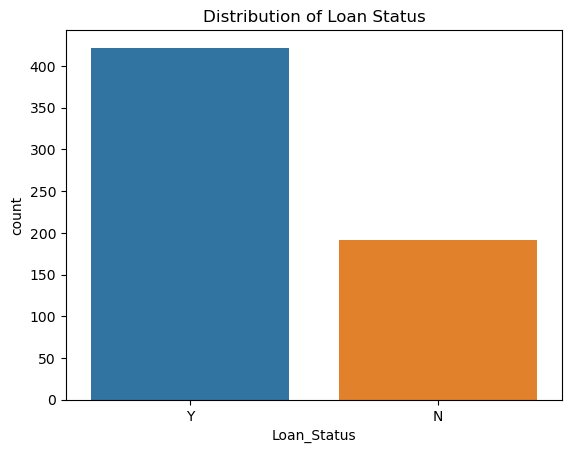

In [20]:
print(data.head())  
print(data.describe()) 
sns.countplot(x="Loan_Status", data=data) 
plt.title("Distribution of Loan Status")
plt.show()

In [21]:
le = LabelEncoder()
data["Loan_Status"] = le.fit_transform(data["Loan_Status"]) 
data.fillna(data.mean(), inplace=True)  

/var/folders/4n/90vjwh8s1zx91p0rv_588gm00000gn/T/ipykernel_41020/4293124600.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [22]:
categorical_features = data.select_dtypes(include=["object"]).columns
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

In [23]:
X = data_encoded.drop("Loan_Status", axis=1)
y = data_encoded["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
lr = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [25]:
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)


/Users/sabuhiaghayev/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
lr_acc = accuracy_score(y_test, lr_pred)
nb_acc = accuracy_score(y_test, nb_pred)
dt_acc = accuracy_score(y_test, dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)



In [28]:

print("Logistic Regression Accuracy:", lr_acc)
print("Naive Bayes Accuracy:", nb_acc)
print("Decision Tree Accuracy:", dt_acc)
print("K-Nearest Neighbors Accuracy:", knn_acc)



Logistic Regression Accuracy: 0.7804878048780488
Naive Bayes Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.6829268292682927
K-Nearest Neighbors Accuracy: 0.5853658536585366


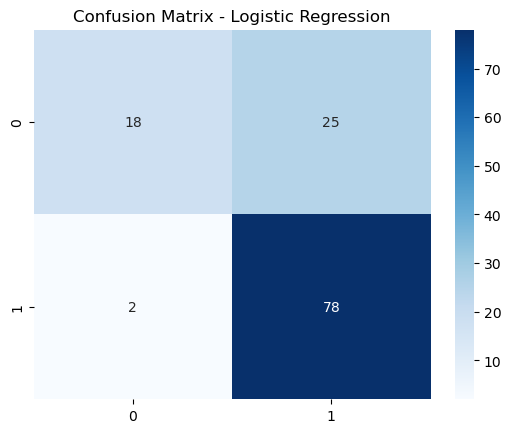

In [29]:

cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()